In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

from scipy.stats import linregress
from contact_resistance_v2 import idea

sns.set_theme(style = 'ticks', palette = 'Set1') #'Set1', 'Pastel1', 'Dark2'

Fit and plot Spacing vs Resistance per sample

In [ ]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_23'
path_save = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results'
sample = '0G_23'
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 80, sample)

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column', s = 70)
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit', hue = 'Column')
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

# tlm.to_csv(os.path.join(path_save, sample + '.txt'), sep = ';', index = False)
# val.to_csv(os.path.join(path_save, 'val_' + sample + '.txt'), sep = ';', index = False)
# display(tlm)
# display(rt)

# sns.lineplot(data = rt, x = 'Potential (V)', y = 'Current (A)', hue = 'Structure', errorbar=None)
# ax.yaxis.set_major_formatter(lambda x, pos: '{:.2f}'.format(x * 1e6))
# ax.set_ylabel('Current ($\mu$A)')
# ax.set_title(sample)

Lets put the samples together

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


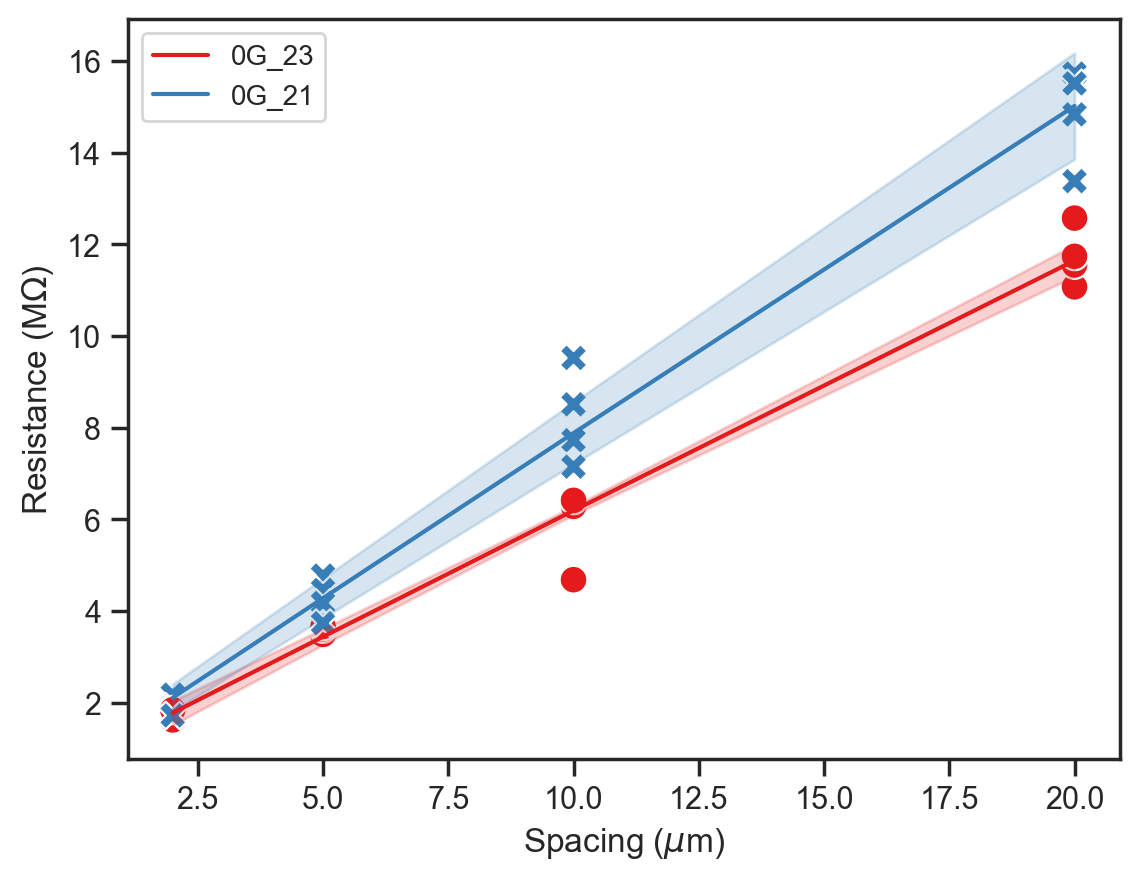

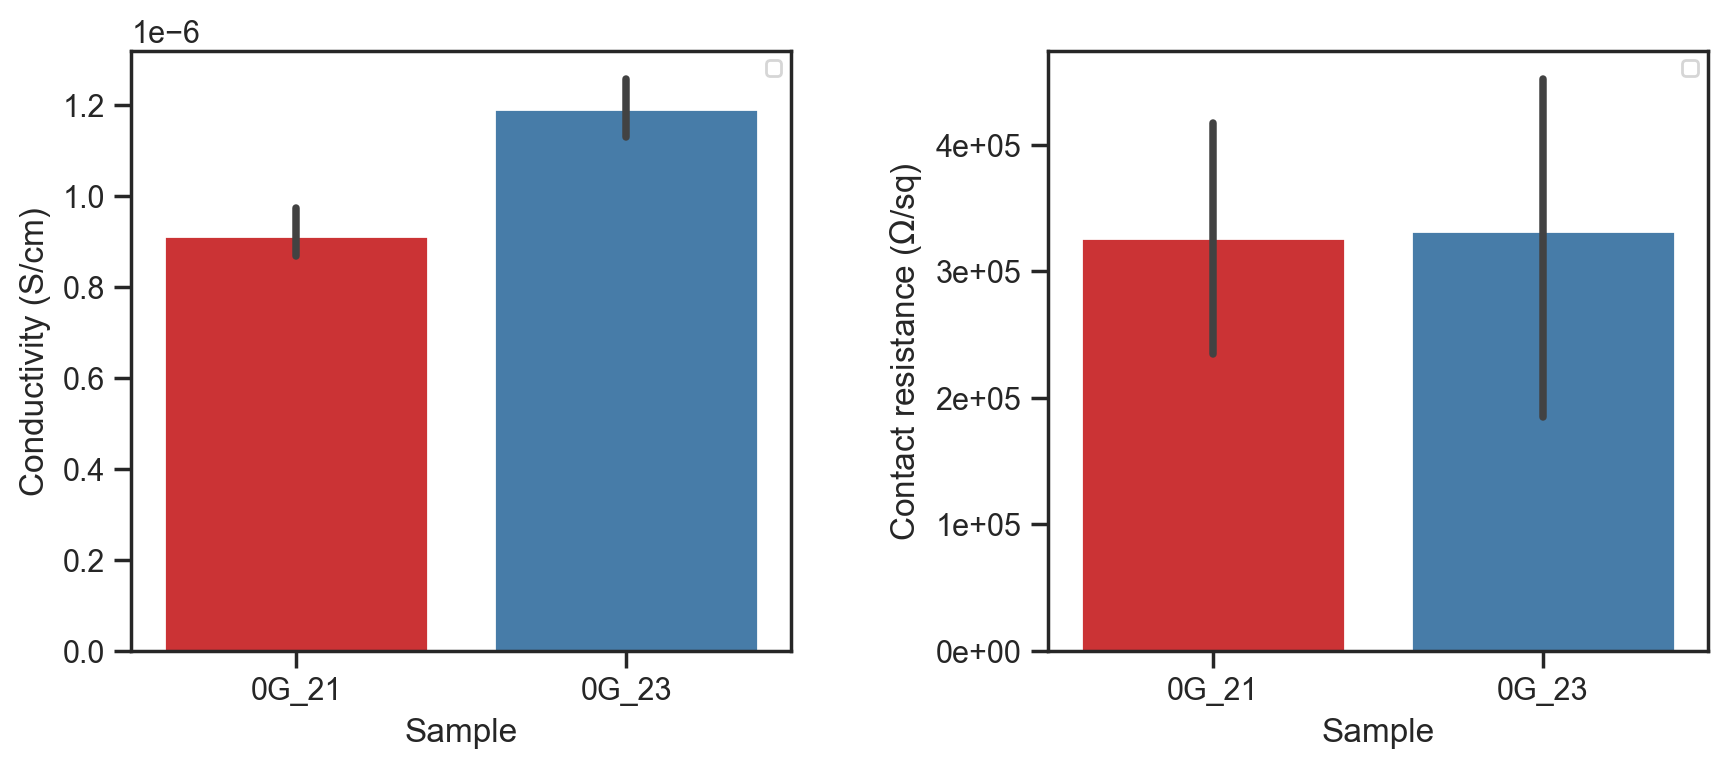

In [21]:
path_results = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results_to_show'
files_r = [os.path.join(path_results, i) for i in os.listdir(path_results)]
col = [	'Spacing ($\mu$m)',	'Resistance (M$\Omega$)',	'Column',	'Fit',	'Sample'] # fix the scale since the label of resistance is in M
col_v = ['Sheet resistance ($\Omega$/sq)', 'Contact resistance ($\Omega$/sq)', 'Conductivity (S/cm)', 'Column', 'Sample' ]
df_values = pd.DataFrame()
df_results = pd.DataFrame()
for i in files_r:
    if 'val' in i:
        df_v = pd.read_csv(i, sep = ';')
        df_values = pd.concat([df_values, df_v])  
    else:
        df = pd.read_csv(i, sep = ';')
        df_results = pd.concat([df_results, df])

df_results = df_results.sort_values(by = ['Column'])
fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = df_results, x = col[0], y = col[1], hue = col[4], style = col[4], legend = None, s = 100)
sns.lineplot(data = df_results, x = col[0], y = col[3], hue = 'Sample', errorbar = 'sd')   #, hue = col[4], style = col[4])
ax.legend(fontsize = 10)
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4)) # fixed
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

fig, ax = plt.subplots(dpi = 200, ncols=2, figsize = [10,5])
fig.tight_layout(pad = 5)
df_values = df_values.sort_values(by=['Column']) # sort by column
sns.barplot(data = df_values, x = 'Sample', y = col_v[2], ax = ax[0]) #, hue = 'Column')
sns.barplot(data = df_values, x = 'Sample', y = col_v[1], ax = ax[1]) #, hue = 'Column')
ax[0].legend(fontsize = 7)
ax[1].legend(fontsize = 7)
ax[1].yaxis.set_major_formatter(lambda x, pos: '{:.0e}'.format(x))

